<a href="https://colab.research.google.com/github/marcelogarret/rna/blob/main/RNA_aula01_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

def criaDataset(n=20, slop=[2, 1], intercept=-0.4):
    X = np.random.uniform(size=(n,2))
    AUX = np.multiply(X, slop)-[0, intercept]
    y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
    return X, y

slop = [-1, 1]
intercept = 1
X, y = criaDataset(slop=slop, intercept=intercept)
X, y

(array([[0.72338458, 0.86403811],
        [0.2855061 , 0.00835752],
        [0.20037814, 0.40633782],
        [0.34221885, 0.85687049],
        [0.35812321, 0.37772847],
        [0.85814298, 0.39755121],
        [0.47451579, 0.22357028],
        [0.5528777 , 0.76971531],
        [0.45674021, 0.92542919],
        [0.82808766, 0.28383655],
        [0.61413829, 0.10640526],
        [0.58818019, 0.62053691],
        [0.20898104, 0.39058276],
        [0.89706427, 0.78099085],
        [0.20259246, 0.94878532],
        [0.58164865, 0.33644414],
        [0.13114657, 0.60242646],
        [0.70441092, 0.21397588],
        [0.81241917, 0.33253717],
        [0.90860719, 0.80959082]]),
 array([-1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1,
         1, -1, -1]))

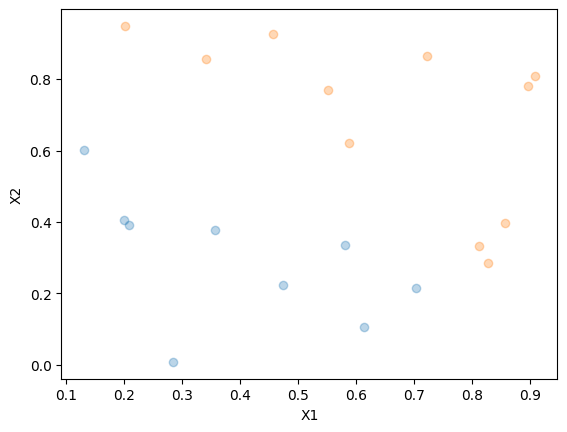

In [3]:
import matplotlib.pyplot as plt

def plotDataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotDataset(X, y)

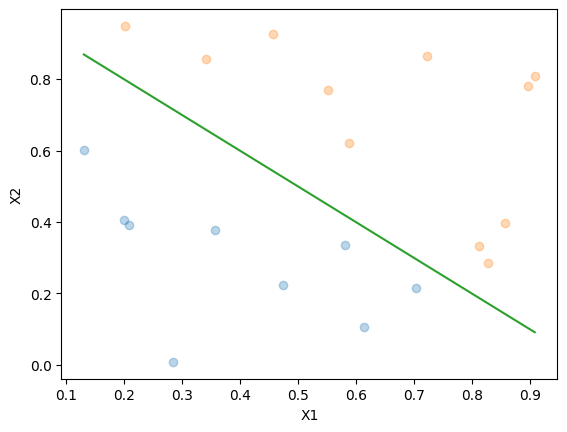

In [5]:
def plotHiperplano(X, y, vetor, intercept):
  x0min = min(X[:,0])
  x0max = max(X[:,0])
  xs = np.linspace(x0min, x0max, num=2)
  ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
  plt.plot(xs, ys)

plotDataset(X, y)
vetor_hiperplano = np.array(slop) * np.array([1, -1])
plotHiperplano(X,y,vetor_hiperplano, intercept)

1.0
[ 21.49143842 -19.98353583 -27.58547309]


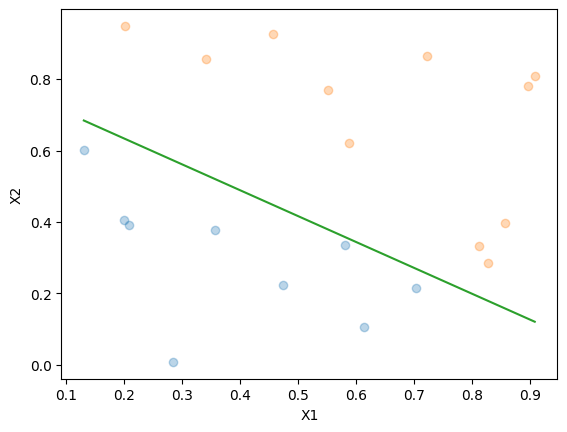

In [15]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

def include_bias(X):
  bias = np.ones((X.shape[0], 1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=100):
    self.w = None
    self.max_iter = max_iter

  def fit(self, X, Y):
    Xb = include_bias(X)
    self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
    for _ in range(self.max_iter):
      ypred = self.predict(X)
      erros = y - ypred
      custo = sum(erros**2)
      if custo == 0:
        break
      self.w += Xb.T @ erros

  def predict(self, X):
    Xb = include_bias(X)
    ypred = Xb @ self.w
    return (ypred > 0) * 2 - 1

perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(accuracy_score(y, ypred))
print(perceptron.w)
plotDataset(X, y)
# plotDataset(X, ypred)
plotHiperplano(X, y, perceptron.w[1:], perceptron.w[0])

0.875
[ 21.49143842 -19.98353583 -27.58547309]


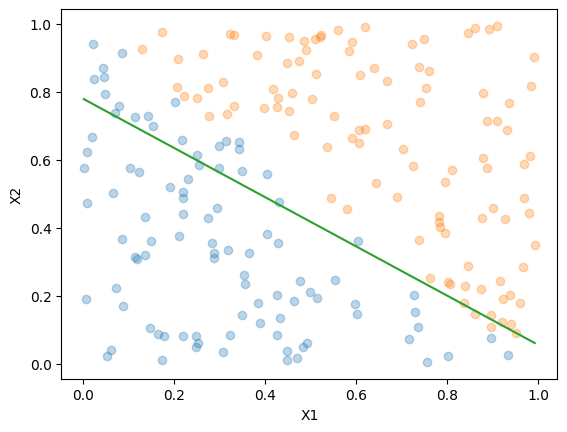

In [16]:
Xte, yte = criaDataset(200, slop, intercept)
ypred = perceptron.predict(Xte)
print(accuracy_score(yte, ypred))
print(perceptron.w)
plotDataset(Xte, yte)
# plotDataset(X, ypred)
plotHiperplano(Xte, yte, perceptron.w[1:], perceptron.w[0])